Confusion Matrix:
[[1939    0]
 [   2   59]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



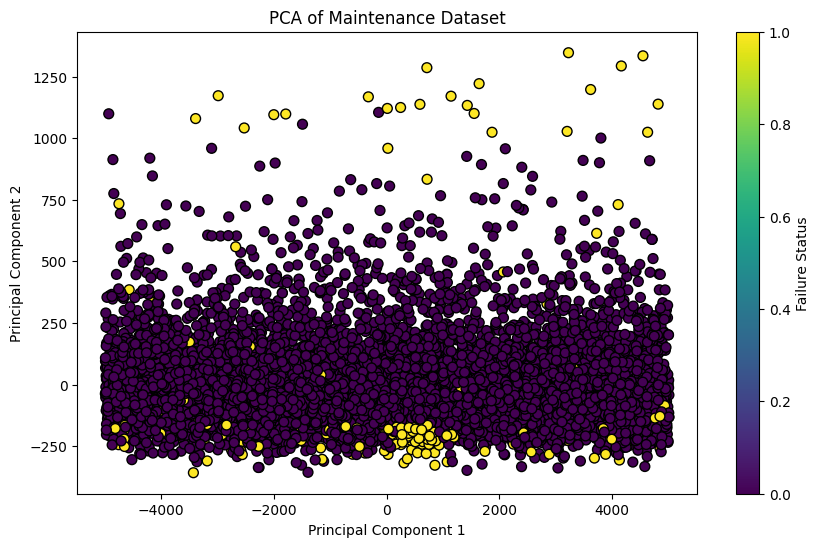

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_csv('Sample Maintenance Data.csv')
#One Hot Encoding
data = pd.get_dummies(data, drop_first=True)


X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))



# Visualize PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Maintenance Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Failure Status')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, f1_score, precision_score, recall_score

# Load the dataset
data = pd.read_csv('Sample Maintenance Data.csv')

# Clean column names to remove unsupported characters
data.columns = data.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

# Convert categorical data to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Define features and target variable
X = data.drop('Target', axis=1)
y = data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XG Boost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
}

# Voting Classifier (Ensemble of all models)
voting_clf = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')
models['Voting Classifier'] = voting_clf

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Train ROC': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
        'Test ROC': roc_auc_score(y_test, y_proba),
        'Train Accuracy': accuracy_score(y_train, model.predict(X_train)),
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Train Log Loss': log_loss(y_train, model.predict_proba(X_train)),
        'Test Log Loss': log_loss(y_test, y_proba),
        'F-Score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

print(results_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:36:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:42:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                     Train ROC  Test ROC  Train Accuracy  Test Accuracy  \
Random Forest         1.000000  0.990281           1.000          0.999   
Gradient Boosting     1.000000  0.983556           1.000          0.999   
XG Boost              1.000000  0.985386           1.000          0.999   
Logistic Regression   0.995763  0.989888           0.999          0.999   
Voting Classifier     1.000000  0.987343           1.000          0.999   

                     Train Log Loss  Test Log Loss   F-Score  Precision  \
Random Forest              0.002821       0.026601  0.983333        1.0   
Gradient Boosting          0.000556       0.008611  0.983333        1.0   
XG Boost                   0.000890       0.010729  0.983333        1.0   
Logistic Regression        0.008603       0.009872  0.983333        1.0   
Voting Classifier          0.002389       0.010442  0.983333        1.0   

                       Recall  
Random Forest        0.967213  
Gradient Boosting    0.967213  
XG

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
